In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
!pip install yfinance

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [96]:
import yfinance as yf

data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "AMC",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "60d",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "30m",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = False,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Datetime,,,,,
2020-12-23 09:30:00-05:00,2.5800,2.640,2.540,2.6200,4005577
2020-12-23 10:00:00-05:00,2.6120,2.650,2.580,2.6150,2377019
2020-12-23 10:30:00-05:00,2.6150,2.630,2.610,2.6250,839572
2020-12-23 11:00:00-05:00,2.6250,2.630,2.610,2.6150,1051420
2020-12-23 11:30:00-05:00,2.6180,2.620,2.600,2.6050,581047
...,...,...,...,...,...
2021-03-22 13:30:00-04:00,12.0700,12.285,12.065,12.2814,2091967
2021-03-22 14:00:00-04:00,12.2807,12.380,12.260,12.3100,2145529
2021-03-22 14:30:00-04:00,12.3100,12.500,12.310,12.4650,2691789


In [97]:
prices = data.reset_index()
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype                           
---  ------    --------------  -----                           
 0   Datetime  775 non-null    datetime64[ns, America/New_York]
 1   Open      775 non-null    float64                         
 2   High      775 non-null    float64                         
 3   Low       775 non-null    float64                         
 4   Close     775 non-null    float64                         
 5   Volume    775 non-null    int64                           
dtypes: datetime64[ns, America/New_York](1), float64(4), int64(1)
memory usage: 36.5 KB


In [98]:
prices['Datetime'] = prices['Datetime'].astype(str)

In [99]:
#remove -5:00
prices['Datetime'] = prices['Datetime'].str.replace('-05:00',"")

In [100]:
prices = prices[(prices['Datetime']>= '2021-01-06 09:30:00') & (prices['Datetime']<='2021-03-12 15:30:00')]
prices

,Datetime,Open,High,Low,Close,Volume
99,2021-01-06 09:30:00,2.0300,2.030,1.9700,1.9980,4744523
100,2021-01-06 10:00:00,1.9950,2.020,1.9900,2.0050,3311871
101,2021-01-06 10:30:00,2.0022,2.230,1.9800,2.0676,8995658
102,2021-01-06 11:00:00,2.0601,2.150,2.0488,2.1060,17592104
103,2021-01-06 11:30:00,2.1050,2.140,2.1000,2.1386,12564470
...,...,...,...,...,...,...
692,2021-03-12 13:30:00,10.9610,11.020,10.8800,10.9610,3497431
693,2021-03-12 14:00:00,10.9700,11.260,10.9600,11.1685,6253498
694,2021-03-12 14:30:00,11.1614,11.300,11.1450,11.2000,5214832
695,2021-03-12 15:00:00,11.2050,11.235,10.8500,11.2314,7146984


In [101]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 99 to 696
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  598 non-null    object 
 1   Open      598 non-null    float64
 2   High      598 non-null    float64
 3   Low       598 non-null    float64
 4   Close     598 non-null    float64
 5   Volume    598 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 32.7+ KB


In [102]:
sentiment = pd.read_csv('/content/drive/MyDrive/FA PROJECT 2021/Correlation/AMC/amc_tweets_1Month.csv',lineterminator='\n')
sentiment.head()

,Datetime,Text,processed_tweet
0,2021-01-06 00:10:43+00:00,XM Best Brokers\nGet $5K bonus\n\nOffers https...,xm best brokers get k bonus offers amzn fb nfl...
1,2021-01-06 00:15:00+00:00,Has a COVID-19 Vaccine Price War Started?\n\n....,has a covid vaccine price war started just di...
2,2021-01-06 00:28:53+00:00,@sideboard_billy @PortfolioXpert An interview ...,billy an interview i watched of ceo discussin...
3,2021-01-06 00:35:43+00:00,Yet $NVAX is waiting for 66 events. https://t....,yet nvax is waiting for events
4,2021-01-06 00:37:47+00:00,@DalhiMackle @Biohazard3737 How much Did $nvax...,how much did nvax grow since it went public ze...


In [103]:
sentiment = sentiment.rename(columns={'Datetime': 'created_at'})

In [104]:
#remove +00:00
sentiment['created_at'] = sentiment['created_at'].str.slice(0,19)

In [105]:
sentiment.head()

,created_at,Text,processed_tweet
0,2021-01-06 00:10:43,XM Best Brokers\nGet $5K bonus\n\nOffers https...,xm best brokers get k bonus offers amzn fb nfl...
1,2021-01-06 00:15:00,Has a COVID-19 Vaccine Price War Started?\n\n....,has a covid vaccine price war started just di...
2,2021-01-06 00:28:53,@sideboard_billy @PortfolioXpert An interview ...,billy an interview i watched of ceo discussin...
3,2021-01-06 00:35:43,Yet $NVAX is waiting for 66 events. https://t....,yet nvax is waiting for events
4,2021-01-06 00:37:47,@DalhiMackle @Biohazard3737 How much Did $nvax...,how much did nvax grow since it went public ze...


In [106]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8773 entries, 0 to 8772
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   created_at       8773 non-null   object
 1   Text             8773 non-null   object
 2   processed_tweet  8773 non-null   object
dtypes: object(3)
memory usage: 205.7+ KB


In [107]:
# convert datetime and created at to same datetime object
prices['Datetime'] = pd.to_datetime(prices['Datetime'])
sentiment['created_at'] = pd.to_datetime(sentiment['created_at'])

In [108]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 99 to 696
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  598 non-null    datetime64[ns]
 1   Open      598 non-null    float64       
 2   High      598 non-null    float64       
 3   Low       598 non-null    float64       
 4   Close     598 non-null    float64       
 5   Volume    598 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 32.7 KB


In [109]:
prices

,Datetime,Open,High,Low,Close,Volume
99,2021-01-06 09:30:00,2.0300,2.030,1.9700,1.9980,4744523
100,2021-01-06 10:00:00,1.9950,2.020,1.9900,2.0050,3311871
101,2021-01-06 10:30:00,2.0022,2.230,1.9800,2.0676,8995658
102,2021-01-06 11:00:00,2.0601,2.150,2.0488,2.1060,17592104
103,2021-01-06 11:30:00,2.1050,2.140,2.1000,2.1386,12564470
...,...,...,...,...,...,...
692,2021-03-12 13:30:00,10.9610,11.020,10.8800,10.9610,3497431
693,2021-03-12 14:00:00,10.9700,11.260,10.9600,11.1685,6253498
694,2021-03-12 14:30:00,11.1614,11.300,11.1450,11.2000,5214832
695,2021-03-12 15:00:00,11.2050,11.235,10.8500,11.2314,7146984


In [110]:
# only close column is needed
prices = prices.drop(columns=['Open','High','Low','Volume'])

In [111]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8773 entries, 0 to 8772
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   created_at       8773 non-null   datetime64[ns]
 1   Text             8773 non-null   object        
 2   processed_tweet  8773 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 205.7+ KB


In [112]:
sentiment

,created_at,Text,processed_tweet
0,2021-01-06 00:10:43,XM Best Brokers\nGet $5K bonus\n\nOffers https...,xm best brokers get k bonus offers amzn fb nfl...
1,2021-01-06 00:15:00,Has a COVID-19 Vaccine Price War Started?\n\n....,has a covid vaccine price war started just di...
2,2021-01-06 00:28:53,@sideboard_billy @PortfolioXpert An interview ...,billy an interview i watched of ceo discussin...
3,2021-01-06 00:35:43,Yet $NVAX is waiting for 66 events. https://t....,yet nvax is waiting for events
4,2021-01-06 00:37:47,@DalhiMackle @Biohazard3737 How much Did $nvax...,how much did nvax grow since it went public ze...
...,...,...,...
8768,2021-02-12 23:18:19,$ctrm Hit $1.95 yesterday\n\n1st target $2.49\...,ctrm hit yesterday st target main target magic...
8769,2021-02-12 23:46:54,"Best place for day trading, swing trading, sto...",best place for day trading swing trading stock...
8770,2021-02-12 23:49:43,@motomotosannn INO HAS 200 million outstanding...,ino has million outstanding shares so every sh...
8771,2021-02-12 23:50:33,Look like legit traders include this chat and ...,look like legit traders include this chat and ...


In [113]:
sentiment = sentiment.rename(columns={'created_at': 'Datetime'})
sentiment

,Datetime,Text,processed_tweet
0,2021-01-06 00:10:43,XM Best Brokers\nGet $5K bonus\n\nOffers https...,xm best brokers get k bonus offers amzn fb nfl...
1,2021-01-06 00:15:00,Has a COVID-19 Vaccine Price War Started?\n\n....,has a covid vaccine price war started just di...
2,2021-01-06 00:28:53,@sideboard_billy @PortfolioXpert An interview ...,billy an interview i watched of ceo discussin...
3,2021-01-06 00:35:43,Yet $NVAX is waiting for 66 events. https://t....,yet nvax is waiting for events
4,2021-01-06 00:37:47,@DalhiMackle @Biohazard3737 How much Did $nvax...,how much did nvax grow since it went public ze...
...,...,...,...
8768,2021-02-12 23:18:19,$ctrm Hit $1.95 yesterday\n\n1st target $2.49\...,ctrm hit yesterday st target main target magic...
8769,2021-02-12 23:46:54,"Best place for day trading, swing trading, sto...",best place for day trading swing trading stock...
8770,2021-02-12 23:49:43,@motomotosannn INO HAS 200 million outstanding...,ino has million outstanding shares so every sh...
8771,2021-02-12 23:50:33,Look like legit traders include this chat and ...,look like legit traders include this chat and ...


In [114]:
# drop na of sentiment
sentiment = sentiment.dropna()

In [115]:
df_merge = pd.merge_asof(sentiment,prices,left_on='Datetime',right_on="Datetime",direction='backward')
df_merge

,Datetime,Text,processed_tweet,Close
0,2021-01-06 00:10:43,XM Best Brokers\nGet $5K bonus\n\nOffers https...,xm best brokers get k bonus offers amzn fb nfl...,NaN
1,2021-01-06 00:15:00,Has a COVID-19 Vaccine Price War Started?\n\n....,has a covid vaccine price war started just di...,NaN
2,2021-01-06 00:28:53,@sideboard_billy @PortfolioXpert An interview ...,billy an interview i watched of ceo discussin...,NaN
3,2021-01-06 00:35:43,Yet $NVAX is waiting for 66 events. https://t....,yet nvax is waiting for events,NaN
4,2021-01-06 00:37:47,@DalhiMackle @Biohazard3737 How much Did $nvax...,how much did nvax grow since it went public ze...,NaN
...,...,...,...,...
8768,2021-02-12 23:18:19,$ctrm Hit $1.95 yesterday\n\n1st target $2.49\...,ctrm hit yesterday st target main target magic...,5.59
8769,2021-02-12 23:46:54,"Best place for day trading, swing trading, sto...",best place for day trading swing trading stock...,5.59
8770,2021-02-12 23:49:43,@motomotosannn INO HAS 200 million outstanding...,ino has million outstanding shares so every sh...,5.59
8771,2021-02-12 23:50:33,Look like legit traders include this chat and ...,look like legit traders include this chat and ...,5.59


In [116]:
df_merge1 = df_merge[df_merge.Close.notnull()]
df_merge1

,Datetime,Text,processed_tweet,Close
17,2021-01-06 10:51:37,$NVAX anyone else seeing an inverse HnS format...,nvax anyone else seeing an inverse hns formati...,2.0676
18,2021-01-06 12:11:20,@GaelicAidan @TrendSpider surely bullish but I...,surely bullish but id say ct isnt really relev...,2.1164
19,2021-01-06 12:28:33,3 Coronavirus Stocks Poised to Soar in 2021 | ...,coronavirus stocks poised to soar in the motl...,2.1164
20,2021-01-06 12:34:41,Virus Plays in Focus as 2021 Gets in Gear (NVA...,virus plays in focus as gets in gear nvax halb...,2.1080
21,2021-01-06 12:50:26,"Bulls out of the cage, $XRP $DOT $IPO $NVAX $D...",bulls out of the cage xrp dot ipo nvax dis hdg...,2.1080
...,...,...,...,...
8768,2021-02-12 23:18:19,$ctrm Hit $1.95 yesterday\n\n1st target $2.49\...,ctrm hit yesterday st target main target magic...,5.5900
8769,2021-02-12 23:46:54,"Best place for day trading, swing trading, sto...",best place for day trading swing trading stock...,5.5900
8770,2021-02-12 23:49:43,@motomotosannn INO HAS 200 million outstanding...,ino has million outstanding shares so every sh...,5.5900
8771,2021-02-12 23:50:33,Look like legit traders include this chat and ...,look like legit traders include this chat and ...,5.5900


In [117]:
df_6jan = df_merge1[(df_merge1['Datetime']<='2021-01-06 15:30:00') & (df_merge1['Datetime']>='2021-01-06 09:00:00')]
df_7jan = df_merge1[(df_merge1['Datetime']<='2021-01-07 15:30:00') & (df_merge1['Datetime']>='2021-01-07 09:00:00')]
df_8jan = df_merge1[(df_merge1['Datetime']<='2021-01-08 15:30:00') & (df_merge1['Datetime']>='2021-01-08 09:00:00')]

df_11jan = df_merge1[(df_merge1['Datetime']<='2021-01-11 15:30:00') & (df_merge1['Datetime']>='2021-01-11 09:00:00')]
df_12jan = df_merge1[(df_merge1['Datetime']<='2021-01-12 15:30:00') & (df_merge1['Datetime']>='2021-01-12 09:00:00')]
df_13jan = df_merge1[(df_merge1['Datetime']<='2021-01-13 15:30:00') & (df_merge1['Datetime']>='2021-01-13 09:00:00')]
df_14jan = df_merge1[(df_merge1['Datetime']<='2021-01-14 15:30:00') & (df_merge1['Datetime']>='2021-01-14 09:00:00')]
df_15jan = df_merge1[(df_merge1['Datetime']<='2021-01-15 15:30:00') & (df_merge1['Datetime']>='2021-01-15 09:00:00')]

df_18jan = df_merge1[(df_merge1['Datetime']<='2021-01-18 15:30:00') & (df_merge1['Datetime']>='2021-01-18 09:00:00')]
df_19jan = df_merge1[(df_merge1['Datetime']<='2021-01-19 15:30:00') & (df_merge1['Datetime']>='2021-01-19 09:00:00')]
df_20jan = df_merge1[(df_merge1['Datetime']<='2021-01-20 15:30:00') & (df_merge1['Datetime']>='2021-01-20 09:00:00')]
df_21jan = df_merge1[(df_merge1['Datetime']<='2021-01-21 15:30:00') & (df_merge1['Datetime']>='2021-01-21 09:00:00')]
df_22jan = df_merge1[(df_merge1['Datetime']<='2021-01-22 15:30:00') & (df_merge1['Datetime']>='2021-01-22 09:00:00')]

df_25jan = df_merge1[(df_merge1['Datetime']<='2021-01-25 15:30:00') & (df_merge1['Datetime']>='2021-01-25 09:00:00')]
df_26jan = df_merge1[(df_merge1['Datetime']<='2021-01-26 15:30:00') & (df_merge1['Datetime']>='2021-01-26 09:00:00')]
df_27jan = df_merge1[(df_merge1['Datetime']<='2021-01-27 15:30:00') & (df_merge1['Datetime']>='2021-01-27 09:00:00')]
df_28jan = df_merge1[(df_merge1['Datetime']<='2021-01-28 15:30:00') & (df_merge1['Datetime']>='2021-01-28 09:00:00')]
df_29jan = df_merge1[(df_merge1['Datetime']<='2021-01-29 15:30:00') & (df_merge1['Datetime']>='2021-01-29 09:00:00')]

df_1feb = df_merge1[(df_merge1['Datetime']<='2021-02-01 15:30:00') & (df_merge1['Datetime']>='2021-02-01 09:00:00')]
df_2feb = df_merge1[(df_merge1['Datetime']<='2021-02-02 15:30:00') & (df_merge1['Datetime']>='2021-02-02 09:00:00')]
df_3feb = df_merge1[(df_merge1['Datetime']<='2021-02-03 15:30:00') & (df_merge1['Datetime']>='2021-02-03 09:00:00')]
df_4feb = df_merge1[(df_merge1['Datetime']<='2021-02-04 15:30:00') & (df_merge1['Datetime']>='2021-02-04 09:00:00')]
df_5feb = df_merge1[(df_merge1['Datetime']<='2021-02-05 15:30:00') & (df_merge1['Datetime']>='2021-02-05 09:00:00')]

df_8feb = df_merge1[(df_merge1['Datetime']<='2021-02-08 15:30:00') & (df_merge1['Datetime']>='2021-02-08 09:00:00')]
df_9feb = df_merge1[(df_merge1['Datetime']<='2021-02-09 15:30:00') & (df_merge1['Datetime']>='2021-02-09 09:00:00')]
df_10feb = df_merge1[(df_merge1['Datetime']<='2021-02-10 15:30:00') & (df_merge1['Datetime']>='2021-02-10 09:00:00')]
df_11feb = df_merge1[(df_merge1['Datetime']<='2021-02-11 15:30:00') & (df_merge1['Datetime']>='2021-02-11 09:00:00')]
df_12feb = df_merge1[(df_merge1['Datetime']<='2021-02-12 15:30:00') & (df_merge1['Datetime']>='2021-02-12 09:00:00')]

In [118]:
frames = [df_6jan,df_7jan,df_8jan,df_11jan, df_12jan, 
          df_13jan,df_14jan,df_15jan,df_18jan,df_19jan,
          df_20jan,df_21jan,df_22jan,df_25jan,df_26jan,
           df_27jan,df_28jan,df_29jan,df_1feb,df_2feb,
          df_3feb,df_4feb,df_5feb,df_8feb,df_9feb,
          df_10feb,df_11feb,df_12feb
          ] 

df_final = pd.concat((frames) , axis = 0)
df_final

,Datetime,Text,processed_tweet,Close
17,2021-01-06 10:51:37,$NVAX anyone else seeing an inverse HnS format...,nvax anyone else seeing an inverse hns formati...,2.0676
18,2021-01-06 12:11:20,@GaelicAidan @TrendSpider surely bullish but I...,surely bullish but id say ct isnt really relev...,2.1164
19,2021-01-06 12:28:33,3 Coronavirus Stocks Poised to Soar in 2021 | ...,coronavirus stocks poised to soar in the motl...,2.1164
20,2021-01-06 12:34:41,Virus Plays in Focus as 2021 Gets in Gear (NVA...,virus plays in focus as gets in gear nvax halb...,2.1080
21,2021-01-06 12:50:26,"Bulls out of the cage, $XRP $DOT $IPO $NVAX $D...",bulls out of the cage xrp dot ipo nvax dis hdg...,2.1080
...,...,...,...,...
8661,2021-02-12 14:45:02,$SNWR ~ Intercept's online platform is dedicat...,snwr intercepts online platform is dedicated ...,5.5900
8662,2021-02-12 15:18:42,$nvax not big technician but stock holding up ...,nvax not big technician but stock holding up v...,5.5600
8663,2021-02-12 15:21:34,@NStocks96 thoughts on NVAX levels today?,thoughts on nvax levels today,5.5600
8664,2021-02-12 15:23:20,long $NVAX 289.90,long nvax,5.5600


In [119]:
df_final = df_final.reset_index(drop=True)
df_final

,Datetime,Text,processed_tweet,Close
0,2021-01-06 10:51:37,$NVAX anyone else seeing an inverse HnS format...,nvax anyone else seeing an inverse hns formati...,2.0676
1,2021-01-06 12:11:20,@GaelicAidan @TrendSpider surely bullish but I...,surely bullish but id say ct isnt really relev...,2.1164
2,2021-01-06 12:28:33,3 Coronavirus Stocks Poised to Soar in 2021 | ...,coronavirus stocks poised to soar in the motl...,2.1164
3,2021-01-06 12:34:41,Virus Plays in Focus as 2021 Gets in Gear (NVA...,virus plays in focus as gets in gear nvax halb...,2.1080
4,2021-01-06 12:50:26,"Bulls out of the cage, $XRP $DOT $IPO $NVAX $D...",bulls out of the cage xrp dot ipo nvax dis hdg...,2.1080
...,...,...,...,...
2565,2021-02-12 14:45:02,$SNWR ~ Intercept's online platform is dedicat...,snwr intercepts online platform is dedicated ...,5.5900
2566,2021-02-12 15:18:42,$nvax not big technician but stock holding up ...,nvax not big technician but stock holding up v...,5.5600
2567,2021-02-12 15:21:34,@NStocks96 thoughts on NVAX levels today?,thoughts on nvax levels today,5.5600
2568,2021-02-12 15:23:20,long $NVAX 289.90,long nvax,5.5600


In [120]:
df_final["Comp"] = ''
df_final["Negative"] = ''
df_final["Neutral"] = ''
df_final["Positive"] = ''
df_final

,Datetime,Text,processed_tweet,Close,Comp,Negative,Neutral,Positive
0,2021-01-06 10:51:37,$NVAX anyone else seeing an inverse HnS format...,nvax anyone else seeing an inverse hns formati...,2.0676,,,,
1,2021-01-06 12:11:20,@GaelicAidan @TrendSpider surely bullish but I...,surely bullish but id say ct isnt really relev...,2.1164,,,,
2,2021-01-06 12:28:33,3 Coronavirus Stocks Poised to Soar in 2021 | ...,coronavirus stocks poised to soar in the motl...,2.1164,,,,
3,2021-01-06 12:34:41,Virus Plays in Focus as 2021 Gets in Gear (NVA...,virus plays in focus as gets in gear nvax halb...,2.1080,,,,
4,2021-01-06 12:50:26,"Bulls out of the cage, $XRP $DOT $IPO $NVAX $D...",bulls out of the cage xrp dot ipo nvax dis hdg...,2.1080,,,,
...,...,...,...,...,...,...,...,...
2565,2021-02-12 14:45:02,$SNWR ~ Intercept's online platform is dedicat...,snwr intercepts online platform is dedicated ...,5.5900,,,,
2566,2021-02-12 15:18:42,$nvax not big technician but stock holding up ...,nvax not big technician but stock holding up v...,5.5600,,,,
2567,2021-02-12 15:21:34,@NStocks96 thoughts on NVAX levels today?,thoughts on nvax levels today,5.5600,,,,
2568,2021-02-12 15:23:20,long $NVAX 289.90,long nvax,5.5600,,,,


In [121]:
df_final['processed_tweet'] = df_final['processed_tweet'].astype(str)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570 entries, 0 to 2569
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Datetime         2570 non-null   datetime64[ns]
 1   Text             2570 non-null   object        
 2   processed_tweet  2570 non-null   object        
 3   Close            2570 non-null   float64       
 4   Comp             2570 non-null   object        
 5   Negative         2570 non-null   object        
 6   Neutral          2570 non-null   object        
 7   Positive         2570 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 160.8+ KB


In [122]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
df_final['Comp'] = [analyzer.polarity_scores(x)['compound'] for x in df_final['processed_tweet']]
df_final['Negative'] = [analyzer.polarity_scores(x)['neg'] for x in df_final['processed_tweet']]
df_final['Neutral'] = [analyzer.polarity_scores(x)['neu'] for x in df_final['processed_tweet']]
df_final['Positive'] = [analyzer.polarity_scores(x)['pos'] for x in df_final['processed_tweet']]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [123]:
df_final

,Datetime,Text,processed_tweet,Close,Comp,Negative,Neutral,Positive
0,2021-01-06 10:51:37,$NVAX anyone else seeing an inverse HnS format...,nvax anyone else seeing an inverse hns formati...,2.0676,0.4019,0.000,0.856,0.144
1,2021-01-06 12:11:20,@GaelicAidan @TrendSpider surely bullish but I...,surely bullish but id say ct isnt really relev...,2.1164,0.2382,0.000,0.915,0.085
2,2021-01-06 12:28:33,3 Coronavirus Stocks Poised to Soar in 2021 | ...,coronavirus stocks poised to soar in the motl...,2.1164,-0.2263,0.225,0.620,0.155
3,2021-01-06 12:34:41,Virus Plays in Focus as 2021 Gets in Gear (NVA...,virus plays in focus as gets in gear nvax halb...,2.1080,-0.0516,0.062,0.881,0.057
4,2021-01-06 12:50:26,"Bulls out of the cage, $XRP $DOT $IPO $NVAX $D...",bulls out of the cage xrp dot ipo nvax dis hdg...,2.1080,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...
2565,2021-02-12 14:45:02,$SNWR ~ Intercept's online platform is dedicat...,snwr intercepts online platform is dedicated ...,5.5900,0.8658,0.000,0.761,0.239
2566,2021-02-12 15:18:42,$nvax not big technician but stock holding up ...,nvax not big technician but stock holding up v...,5.5600,0.4748,0.000,0.914,0.086
2567,2021-02-12 15:21:34,@NStocks96 thoughts on NVAX levels today?,thoughts on nvax levels today,5.5600,0.0000,0.000,1.000,0.000
2568,2021-02-12 15:23:20,long $NVAX 289.90,long nvax,5.5600,0.0000,0.000,1.000,0.000


% of positive tweets=  50.89494163424124
% of negative tweets=  14.941634241245136


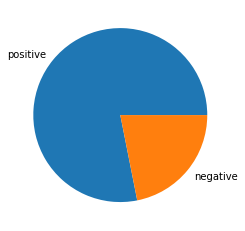

In [124]:
posi=0
nega=0
for i in range (0,len(df_final)):
    get_val=df_final['Comp'][i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(df_final)))*100
negper=(nega/(len(df_final)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)

arr=np.asarray([posper,negper], dtype=int)
plt.pie(arr,labels=['positive','negative'])
plt.plot()
plt.show()

In [125]:
df_final = df_final.groupby(df_final.Datetime.dt.floor('30min')).mean()

In [126]:
df_final

,Close,Comp,Negative,Neutral,Positive
Datetime,,,,,
2021-01-06 10:30:00,2.0676,0.401900,0.000000,0.856000,0.144000
2021-01-06 12:00:00,2.1164,0.005950,0.112500,0.767500,0.120000
2021-01-06 12:30:00,2.1080,0.283033,0.020667,0.881333,0.098000
2021-01-06 13:00:00,2.1037,0.822500,0.000000,0.744000,0.256000
2021-01-06 13:30:00,2.0748,0.176360,0.000000,0.909600,0.090400
...,...,...,...,...,...
2021-02-12 13:00:00,5.7001,0.105225,0.036000,0.903500,0.060500
2021-02-12 13:30:00,5.6750,0.423170,0.000000,0.909400,0.090600
2021-02-12 14:00:00,5.6101,0.377914,0.000000,0.922357,0.077643


In [127]:
df_final = df_final.drop(columns=['Negative','Neutral','Positive'])
df_final

,Close,Comp
Datetime,,
2021-01-06 10:30:00,2.0676,0.401900
2021-01-06 12:00:00,2.1164,0.005950
2021-01-06 12:30:00,2.1080,0.283033
2021-01-06 13:00:00,2.1037,0.822500
2021-01-06 13:30:00,2.0748,0.176360
...,...,...
2021-02-12 13:00:00,5.7001,0.105225
2021-02-12 13:30:00,5.6750,0.423170
2021-02-12 14:00:00,5.6101,0.377914


In [128]:
from sklearn import preprocessing

x = df_final.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df

,0,1
0,0.003224,0.733708
1,0.005956,0.509132
2,0.005486,0.666289
3,0.005245,0.972265
4,0.003627,0.605785
...,...,...
314,0.206555,0.565439
315,0.205150,0.745772
316,0.201517,0.720103
317,0.200392,0.637729


In [129]:
df = df.set_index(df_final.index)

In [130]:
result = df_final.join(df)
result

,Close,Comp,0,1
Datetime,,,,
2021-01-06 10:30:00,2.0676,0.401900,0.003224,0.733708
2021-01-06 12:00:00,2.1164,0.005950,0.005956,0.509132
2021-01-06 12:30:00,2.1080,0.283033,0.005486,0.666289
2021-01-06 13:00:00,2.1037,0.822500,0.005245,0.972265
2021-01-06 13:30:00,2.0748,0.176360,0.003627,0.605785
...,...,...,...,...
2021-02-12 13:00:00,5.7001,0.105225,0.206555,0.565439
2021-02-12 13:30:00,5.6750,0.423170,0.205150,0.745772
2021-02-12 14:00:00,5.6101,0.377914,0.201517,0.720103


In [131]:
result = result.rename(columns={0: 'normalised_close', 1: 'normalised_comp'})
result

,Close,Comp,normalised_close,normalised_comp
Datetime,,,,
2021-01-06 10:30:00,2.0676,0.401900,0.003224,0.733708
2021-01-06 12:00:00,2.1164,0.005950,0.005956,0.509132
2021-01-06 12:30:00,2.1080,0.283033,0.005486,0.666289
2021-01-06 13:00:00,2.1037,0.822500,0.005245,0.972265
2021-01-06 13:30:00,2.0748,0.176360,0.003627,0.605785
...,...,...,...,...
2021-02-12 13:00:00,5.7001,0.105225,0.206555,0.565439
2021-02-12 13:30:00,5.6750,0.423170,0.205150,0.745772
2021-02-12 14:00:00,5.6101,0.377914,0.201517,0.720103


In [132]:
result.corr()

,Close,Comp,normalised_close,normalised_comp
Close,1.000000,-0.024385,1.000000,-0.024385
Comp,-0.024385,1.000000,-0.024385,1.000000
normalised_close,1.000000,-0.024385,1.000000,-0.024385
normalised_comp,-0.024385,1.000000,-0.024385,1.000000


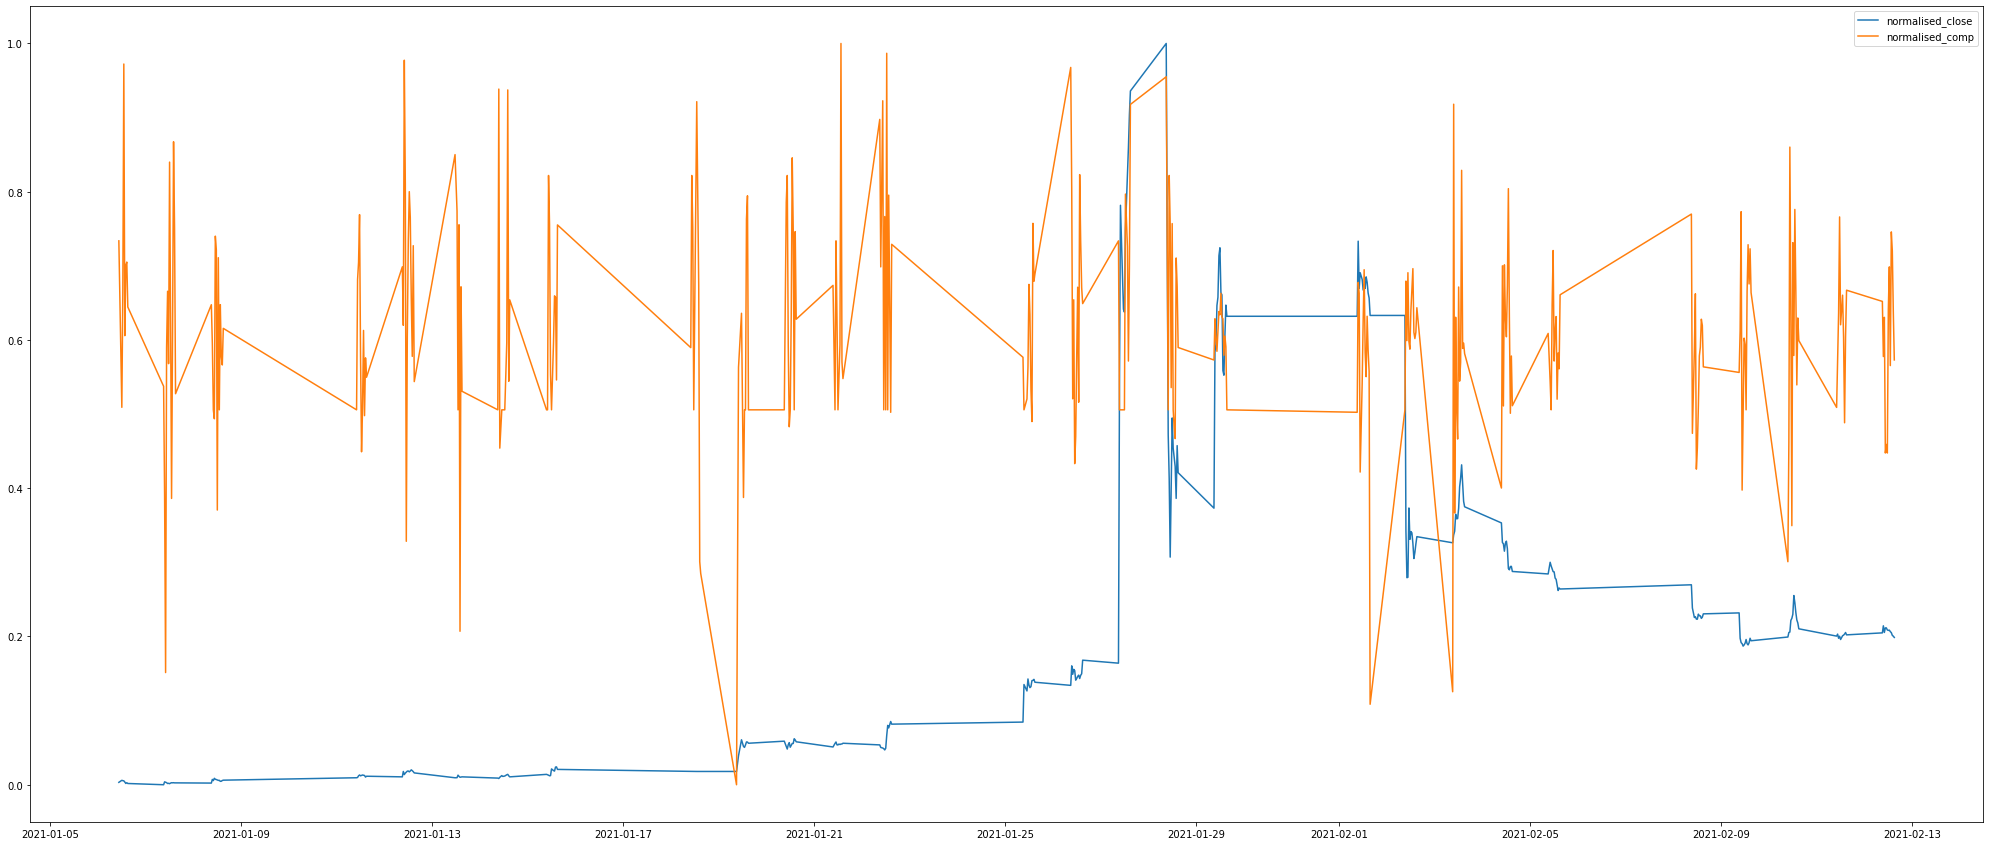

In [133]:
#Plot graphs
fig = plt.figure(figsize=(35,15))
plt.plot(result.index,result['normalised_close'], label = "normalised_close")
plt.plot(result.index,result['normalised_comp'], label = "normalised_comp")
plt.legend()
plt.show()

In [134]:
corr = result.corr()
correlation = (corr['Close'][-1])
counter = 0
while (abs(correlation)<0.5):
  counter = counter - 1
  if counter == len(result):
    break
  else:
    result['Close'] = result['Close'].shift(counter)
  corr = result.corr()
  correlation = (corr['Close'][-1])

In [135]:
result

,Close,Comp,normalised_close,normalised_comp
Datetime,,,,
2021-01-06 10:30:00,NaN,0.401900,0.003224,0.733708
2021-01-06 12:00:00,NaN,0.005950,0.005956,0.509132
2021-01-06 12:30:00,NaN,0.283033,0.005486,0.666289
2021-01-06 13:00:00,NaN,0.822500,0.005245,0.972265
2021-01-06 13:30:00,NaN,0.176360,0.003627,0.605785
...,...,...,...,...
2021-02-12 13:00:00,NaN,0.105225,0.206555,0.565439
2021-02-12 13:30:00,NaN,0.423170,0.205150,0.745772
2021-02-12 14:00:00,NaN,0.377914,0.201517,0.720103


In [136]:
result.corr()

,Close,Comp,normalised_close,normalised_comp
Close,NaN,NaN,NaN,NaN
Comp,NaN,1.000000,-0.024385,1.000000
normalised_close,NaN,-0.024385,1.000000,-0.024385
normalised_comp,NaN,1.000000,-0.024385,1.000000


In [137]:
final_result = result.dropna()
final_result

,Close,Comp,normalised_close,normalised_comp
Datetime,,,,
